In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for plotting graphs
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Read in the data

In [3]:
# list files available
print(os.listdir("../input"))

['titanic']


In [4]:
# Trianing Data 
train = pd.read_csv('../input/titanic/train.csv')
print("Training Data Shape", train.shape)
train.head()

Training Data Shape (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Testing Data Features
test = pd.read_csv('../input/titanic/test.csv')
print("Testing Data Shape",test.shape)
test.head()

Testing Data Shape (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis(EDA)

In [6]:
# Examine the distribution of target column
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

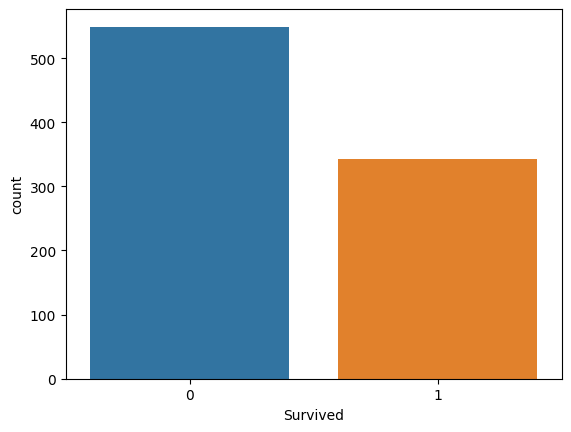

In [7]:
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

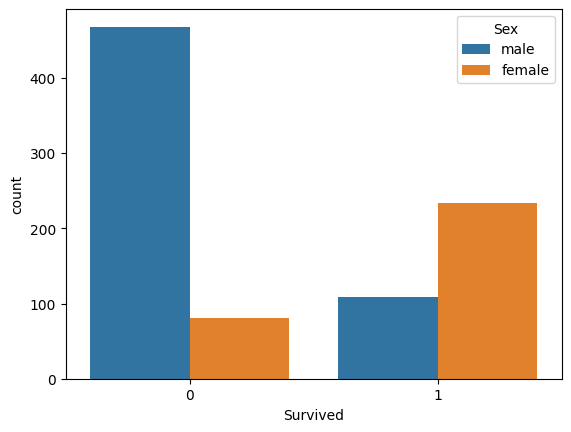

In [8]:
sns.countplot(x='Survived',data=train,hue='Sex')

# Alternative of count plot , just for practice 
 ### 1. BarPlot
 ### 2. Histogram 
 ### 3. Point plot
 ### 4. Pie Chart
 ### 5. Catplot(Generalized Plot)

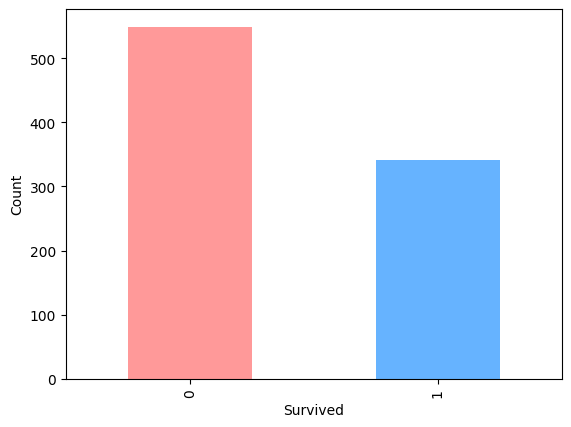

In [9]:
# Bar plot
import matplotlib.pyplot as plt

# calculate counts
counts = train['Survived'].value_counts()

# Create a bar plot with custom colors
colors = ['#FF9999','#66B3FF']
counts.plot(kind='bar',color = colors)

plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

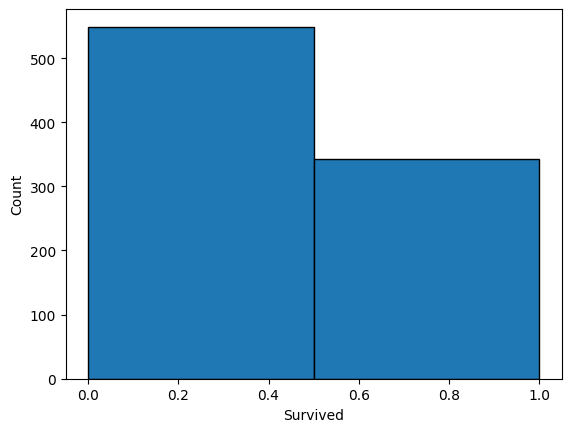

In [10]:
# histogram
plt.hist(train['Survived'],bins=len(train['Survived'].unique()), edgecolor='black')
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

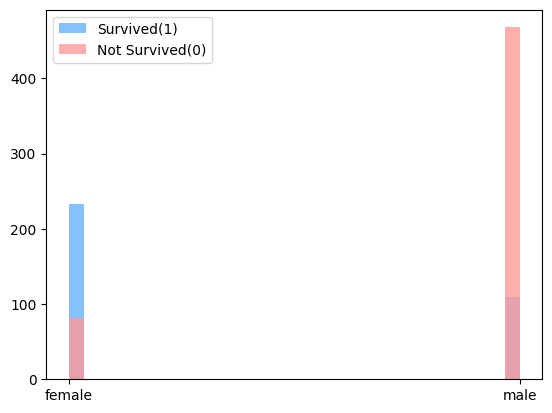

In [11]:
survived = train[train['Survived']==1]['Sex']
not_survived = train[train['Survived']==0]['Sex']
plt.hist(survived, bins=30, alpha =0.8, color='#66b3FF',label='Survived(1)')
plt.hist(not_survived, bins=30, alpha =0.8, color='#FF9999',label='Not Survived(0)')
plt.legend()
plt.show()

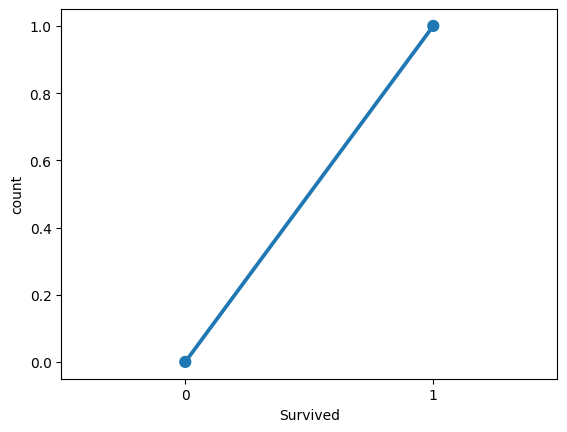

In [12]:
# Point Plot
sns.pointplot(data=train, x = 'Survived',y ='Survived')
plt.ylabel('count')
plt.show()

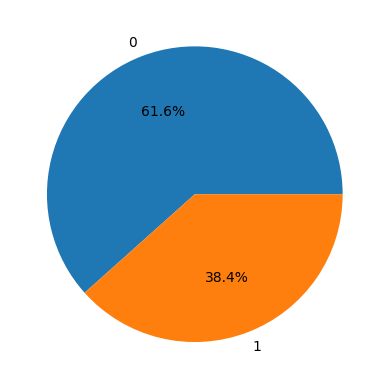

In [13]:
# Pie Chart
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('') # hide the ylabel for cleaner display
plt.show()

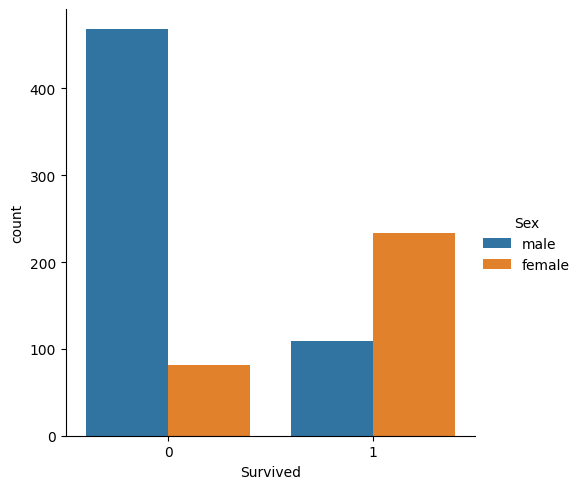

In [14]:
# catlplot
sns.catplot(data=train,x = 'Survived',kind='count',hue = 'Sex')
plt.show()

***We can see using countplot that females survived in much higher proportions than males did. Now, let's see how many people survived divided by class***

<Axes: xlabel='Survived', ylabel='count'>

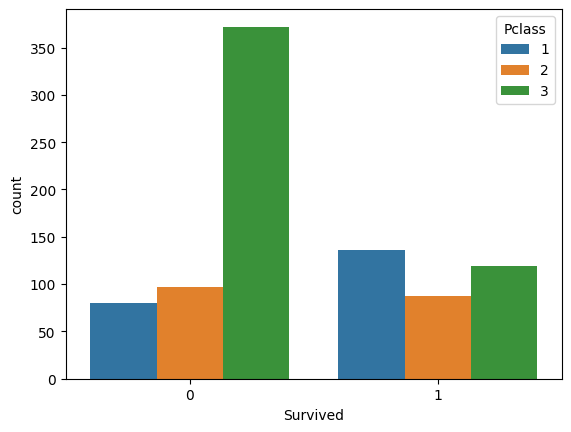

In [15]:
sns.countplot(x='Survived',hue ='Pclass',data=train)

Text(0.5, 1.0, 'Age Distribution by Passenger Class on the Titanic')

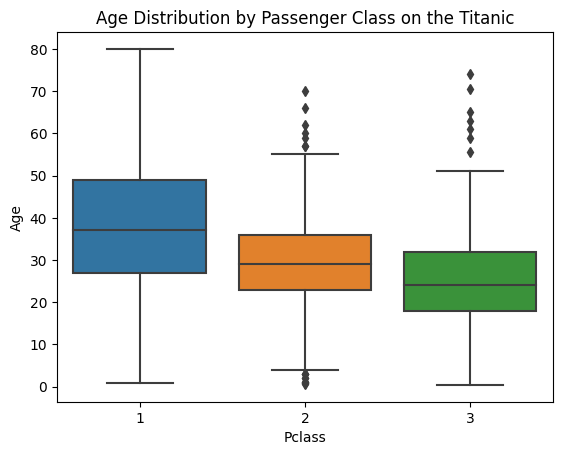

In [16]:
sns.boxplot(x ='Pclass',data=train,y='Age')
plt.title("Age Distribution by Passenger Class on the Titanic")

### Examining the missing values


In [17]:
print("Null in training set")
print("---------------------")
print(train.isnull().sum())
print("---------------------")
print("Null in the testing set")
print("------------------------")
print(test.isnull().sum())

Null in training set
---------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
---------------------
Null in the testing set
------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**The three columns i.e Age, cabin and Embarked have missing values which needs to be taken care of.**

In [18]:
# 1. Age Column
# create a fucntion to impute ages regarding the corresponding age average per class

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train['Pclass']==Pclass]["Age"].mean())
    else:
        return Age
        

In [19]:
# def imputes_age(df):
#     for pclass in df['Pclass'].unique():
#         #calculate the mean age for each class
#         avg_age = df[df['Pclass']==pclass]['Age'].mean()
        
#         # impute missing ages in that class with the average age
#         df.loc[(df['Age'].isnull()) & (df['Pclass']==pclass),'Age'] = aveg_age
#     return df
        

In [20]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

Here we use pclass for imputation values in the age column because age column has high correlation with pclass column

In [21]:
# corrrelation matrix
corr_matrix = train['Age'].corr(train['Pclass'])
print("Correlation b/w Age and Pclass",corr_matrix)

Correlation b/w Age and Pclass -0.4039234325811039


<Axes: xlabel='Pclass', ylabel='Age'>

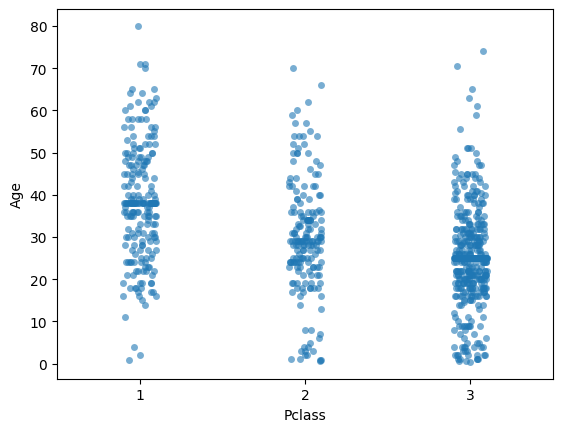

In [22]:
# visualizing this relation
# scatter plot with jitter for pclass
sns.stripplot(x='Pclass',y='Age',data=train,alpha=0.6,jitter=True)

<Axes: xlabel='Pclass', ylabel='AgeGroup'>

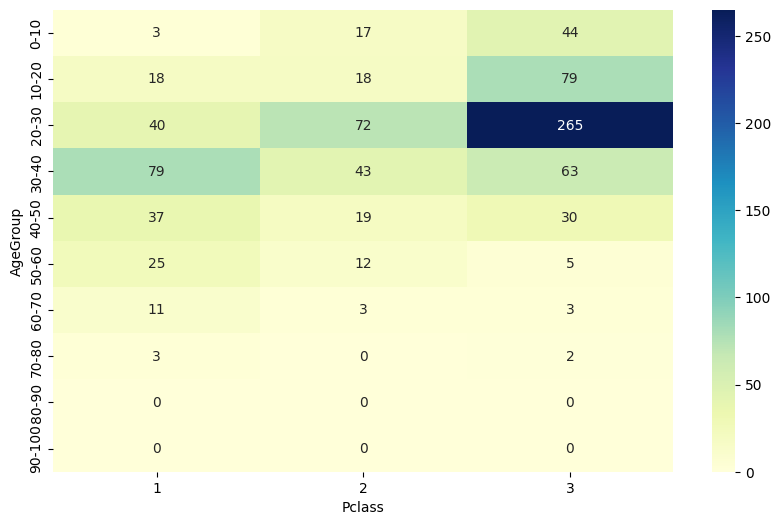

In [23]:
# heatmap
# s-1 : create bins for the age
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Define your age bins
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# bin the age column
train['AgeGroup'] = pd.cut(train['Age'],bins=age_bins,labels=age_labels)

# create a Pivot table
pivot_table = train.pivot_table(index='AgeGroup',columns='Pclass',aggfunc= 'size',fill_value=0)

# create heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap='YlGnBu',annot= True ,fmt='d')

2. Missing Values in cabin
--> Since we have lots of null value for cabin column, so it is better to remove it.

In [24]:
train.drop("Cabin",inplace=True,axis=1)
test.drop("Cabin",inplace=True,axis=1)

3. Missing values in Embarked Column
=> Since there are just two missing values, we shall impute them with the mode of the Embarked column.

In [25]:
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace=True)

3. Missing values in the Fare Column in test dataset
--> Since there is a one missing value, we shall impute them the mean of the fare column

In [26]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

## Creating new features
We shall create a new column called Family by combining Parch and SibSp columns

In [27]:
def combine(df, col1,col2):
    df['Family']=df[col1] + df[col2]
    df.drop([col1,col2],inplace=True, axis=1)
    return df
train = combine(train , "SibSp","Parch")
test = combine(test, 'SibSp', 'Parch')

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,AgeGroup,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,20-30,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,30-40,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,20-30,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,30-40,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,30-40,0


In [29]:
# let's take a look at the age column
train['Age'].describe()

count    891.000000
mean      29.252716
std       13.211959
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

Age column needs to be treated slightly differently, as this continous numerical column. we can separate this continuous feature into a categorical feature by dividing it into ranges.

In [30]:
def process_age(df, cut_points , label_names):
    df['Age'] = df['Age'].fillna(-0.5)
    df['Age_categories'] = pd.cut(df['Age'],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,15,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

                Survived
Age_categories          
Infant          0.704545
Child           0.461538
Teenager        0.375000
Young Adult     0.346535
Adult           0.408889
Senior          0.227273


<Axes: xlabel='Age_categories'>

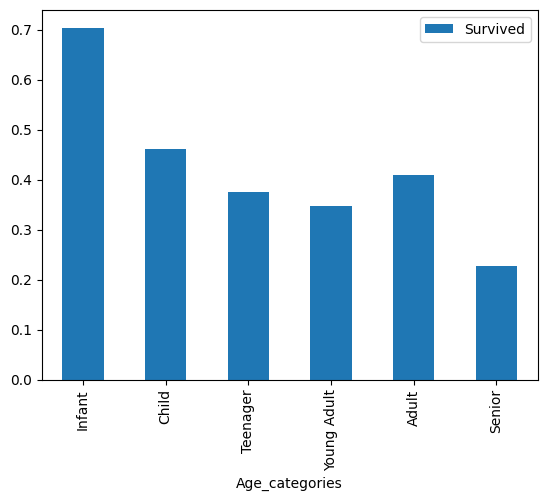

In [31]:
pivot = train.pivot_table(index = "Age_categories",values = 'Survived')
print(pivot)
pivot.plot.bar()

## Encoding Categorical values

We can use the pandas.get_dummies() function now, we shall have to encode Sex, Embarked, pclass, and Age_categories. Name and ticket columns have a lot of categories, hence we shall delete them

In [32]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix =  column_name)
    df = pd.concat([df,dummies], axis =1)
    return df

for column in ["Pclass","Sex","Age_categories","Embarked"]:
    train =  create_dummies(train,column)
    test = create_dummies(test,column)

#### Dropping unnecessary columns

In [33]:
train.drop(['Name','Sex','Ticket','Pclass','Age_categories','Embarked'],inplace=True,axis=1)
test.drop(['Name',"Sex",'Ticket','Pclass','Age_categories','Embarked'],inplace=True,axis=1)

In [34]:
train.head()

,PassengerId,Survived,Age,Fare,AgeGroup,Family,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,7.2500,20-30,1,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
1,2,1,38.0,71.2833,30-40,1,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
2,3,1,26.0,7.9250,20-30,0,False,False,True,True,...,False,False,False,False,True,False,False,False,False,True
3,4,1,35.0,53.1000,30-40,1,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
4,5,0,35.0,8.0500,30-40,0,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True


# Logistice Regression Implementation

We will use Logistic Regressionfrom Scikit-Learn model. The only change we will make from the default model settings is to lower the regularization parameter, C, which controls the amount of overfitting (a lower value should decrease overfitting). This will get us slightly better results than the default Logistic Regression.

The .fit() method accepts two arguments: X and y. X must be a two dimensional array (like a dataframe) of the features that we wish to train our model on, and y must be a one-dimensional array (like a series) of our target, or the column we wish to predict.

In [35]:
lr = LogisticRegression()
columns = ['PassengerId', 'Age', 'Fare', 'Family',
            'Pclass_1', 'Pclass_2', 'Pclass_3',
            'Sex_female', 'Sex_male',
            'Age_categories_Missing', 'Age_categories_Infant',
            'Age_categories_Child', 'Age_categories_Teenager',
            'Age_categories_Young Adult','Age_categories_Adult',
            'Age_categories_Senior'
          ]
lr.fit(train[columns],train['Survived'])

LogisticRegression()

**Evaluating Accuracy of the model**

The evaluation criteria given on the Titanic Data page is accuracy, i.e how many correct predictions we have made out of the total predictions. We have created our model but how will we know how accurate it is? We do have a Test dataset but since it doesn't have the Target column, everytime we optimize our model, we will have to submit our predictions to public Leaderboard to assess it accuracy.

Creating a Validation set
Another option would be to create a validation set from the training set. We will hold out a part of the training set during the start of the experiment and use it for evaluating our predictions.

In [36]:
X = train[columns]
y = train['Survived']
train_X, val_X, train_y, val_y = train_test_split(
    X,y, test_size=0.2,random_state=0)

Making predictions and Measuring accuracy

In [37]:
lr = LogisticRegression()
lr.fit(train_X, train_y)

LogisticRegression()

In [38]:
predictions = lr.predict(val_X)
accuracy = accuracy_score(val_y,predictions)
print(accuracy)

0.7988826815642458


In [39]:
from sklearn.metrics import classification_report
print(classification_report(val_y, predictions))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



Using cross validation for more robust error measurement

Using a Validation dataset has a drawback. Firstly, it decreases the training data and secondly since it is tested against a small amount of data, it has high chances of overfitting. To overcome this, there is a technique called cross validation. The most common form of cross validation, and the one we will be using, is called k-fold cross validation. ‘Fold’ refers to each different iteration that we train our model on, and ‘k’ just refers to the number of folds. In the diagram above, we have illustrated k-fold validation where k is 5.

In [40]:
lr = LogisticRegression()
scores = cross_val_score(lr,X,y,cv=10)
scores.sort()
accuracy = scores.mean()
print("Scores are :" ,scores)
print("Accuracy is :" ,accuracy)

Scores are : [0.76404494 0.7752809  0.79775281 0.80898876 0.81111111 0.82022472
 0.83146067 0.83146067 0.83146067 0.87640449]
Accuracy is : 0.8148189762796504


In [41]:
lr = LogisticRegression()
lr.fit(X,y)
predictions_test = lr.predict(test[columns])

In [42]:
# Submission
submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [43]:
submission_df = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':predictions_test})
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [44]:
train.head(5)

,PassengerId,Survived,Age,Fare,AgeGroup,Family,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,7.2500,20-30,1,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
1,2,1,38.0,71.2833,30-40,1,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
2,3,1,26.0,7.9250,20-30,0,False,False,True,True,...,False,False,False,False,True,False,False,False,False,True
3,4,1,35.0,53.1000,30-40,1,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
4,5,0,35.0,8.0500,30-40,0,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True


In [45]:
# Now, to get the prediction for PassengerId = 892:
specific_id = 895
prediction = submission_df[submission_df['PassengerId'] == specific_id]

# Print the result
print(prediction)


   PassengerId  Survived
3          895         0


In [46]:
# Fit the model on training data
lr.fit(X, y)

# Predict on the training data
predictions_train = lr.predict(X)

# Create a DataFrame for training predictions
train_predictions_df = pd.DataFrame({'PassengerId': train['PassengerId'], 'Survived': predictions_train})

specific_id = 1
train_prediction = train_predictions_df[train_predictions_df['PassengerId'] == specific_id]

print(train_prediction)
print(accuracy_score(y,predictions_train))

   PassengerId  Survived
0            1         0
0.8170594837261503
